Qns1:

In [1]:
import pandas as pd
import numpy as np
data = pd.read_fwf("housing.data", header=None)
data.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Qns2:

Qns3:

In [2]:
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


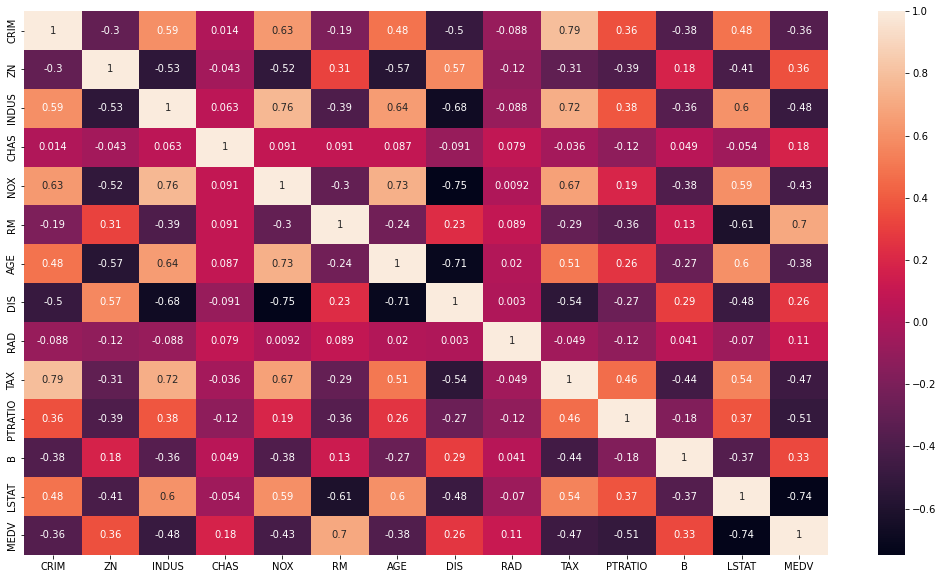

In [3]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(), annot=True, ax=ax);

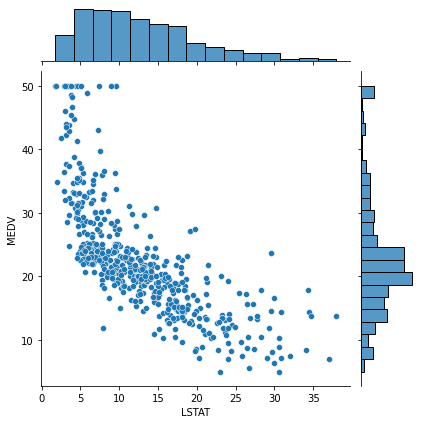

In [4]:
# % lower status of the population vs Median value of owner-occupied homes in $1000's
sns.jointplot(x=data.LSTAT, y=data.MEDV );

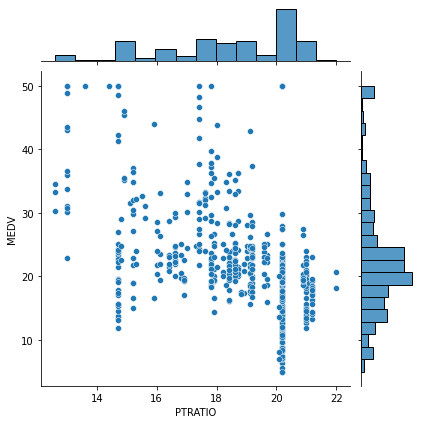

In [5]:
# pupil-teacher ratio by town vs Median value of owner-occupied homes in $1000's
sns.jointplot(x=data.PTRATIO, y=data.MEDV );

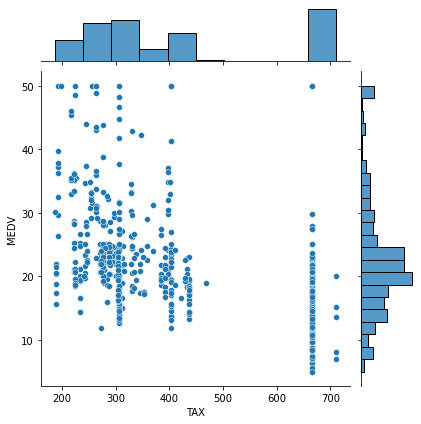

In [6]:
#full-value property-tax rate per $10,000 vs Median value of owner-occupied homes in $1000's
sns.jointplot(x=data.TAX, y=data.MEDV);

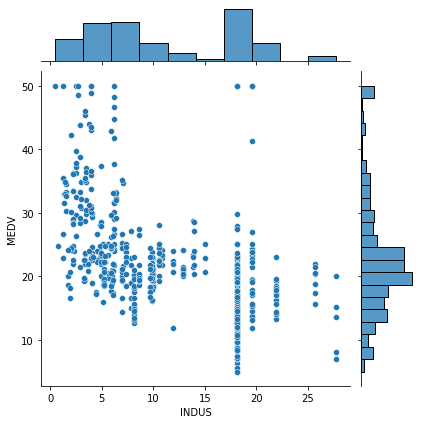

In [7]:
# proportion of non-retail business acres per town vs Median value of owner-occupied homes in $1000's
sns.jointplot(x=data.INDUS, y=data.MEDV );

Qns4

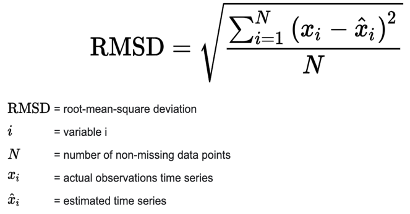
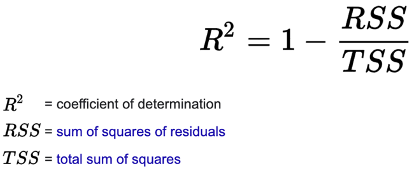

In [8]:
from math import sqrt
# Calculate root mean squared error and r2 score
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

def R2_score(actual, predicted):
    actual_bar = actual.mean()
    ss_tot = ((actual-actual_bar)**2).sum()
    ss_res = ((actual-predicted)**2).sum()
    return 1 - (ss_res/ss_tot)

Qns5:

In [9]:
def cal_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def gradient_descent(X,y,theta,learning_rate,iterations):
    m = len(y)
    n = np.shape(X)[1]
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,n))
    for it in range(iterations):
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*learning_rate*(X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
    return theta, cost_history, theta_history

Qns6:

In [10]:
#Convert to numpy first
data_matrix=data.to_numpy()
#Normalise the data
def dataNorm(data):
    x_lst=[]
    row=np.shape(data)[0]
    col=np.shape(data)[1]
    i=0
    while i<col:
        for col_item in data[:,i]:
            if i==col-1:
                x_lst.append(col_item)
            else:
                y=(col_item - data[:,i].min())/(data[:,i].max() - data[:,i].min())
                x_lst.append(y)
        i+=1
    return np.array(x_lst).reshape((row, col), order='F')

Qns7:

In [11]:
def splitTT(data, split):
    np.random.shuffle(data)
    size = round(np.shape(data)[0]*split)
    train_set, test_set = data[:size,:], data[size:,:]
    return [train_set, test_set]

data_norm=dataNorm(data_matrix)
data_split=splitTT(data_norm, 0.9)
testing=data_split[1]
training=data_split[0]
X_train = training[:,:13]
y_train = training[:,13:14]
X_test = testing[:,:13]
y_test = testing[:,13:14]

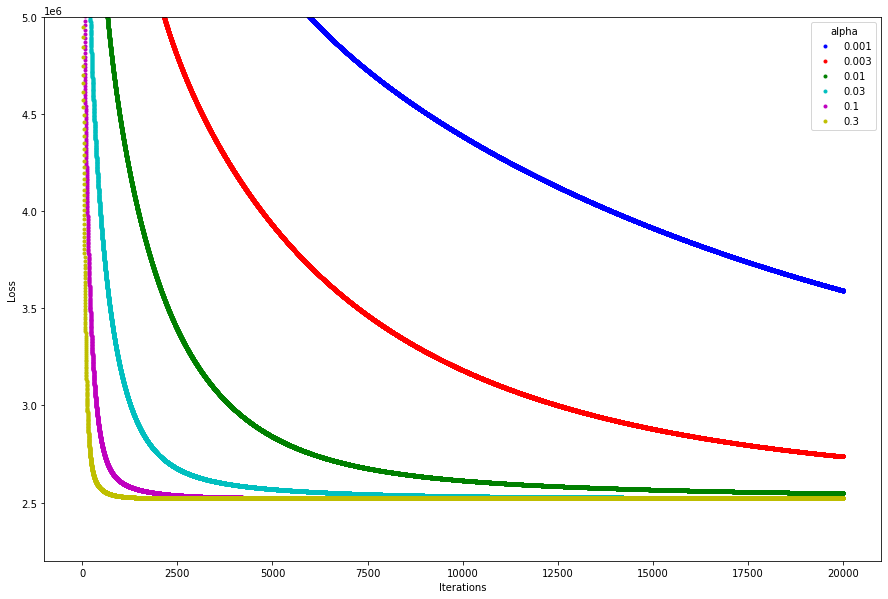

In [12]:
#Qns6
#plot the cost history
#learning_rate=0.001, 0.003, 0.01, 0.03, 0.1, 0.3
n_iter=20000
X_bias = np.c_[np.ones((len(X_train),1)),X_train]
cost_list0=gradient_descent(X_bias,y_train,np.random.randn(14,1),0.001,n_iter)
cost_history0=cost_list0[1]
cost_list1=gradient_descent(X_bias,y_train,np.random.randn(14,1),0.003,n_iter)
cost_history1=cost_list1[1]
cost_list2=gradient_descent(X_bias,y_train,np.random.randn(14,1),0.01,n_iter)
cost_history2=cost_list2[1]
cost_list3=gradient_descent(X_bias,y_train,np.random.randn(14,1),0.03,n_iter)
cost_history3=cost_list3[1]
cost_list4=gradient_descent(X_bias,y_train,np.random.randn(14,1),0.1,n_iter)
cost_history4=cost_list4[1]
cost_list5=gradient_descent(X_bias,y_train,np.random.randn(14,1),0.3,n_iter)
cost_history5=cost_list5[1]
fig,ax = plt.subplots(figsize=(15,10))
ax.axis(ymin=2200000, ymax=5000000)


ax.set_ylabel('Loss')
ax.set_xlabel('Iterations')
ax.plot(range(n_iter), cost_history0,'b.', label='0.001')
ax.plot(range(n_iter), cost_history1,'r.', label='0.003')
ax.plot(range(n_iter), cost_history2,'g.', label='0.01')
ax.plot(range(n_iter), cost_history3,'c.', label='0.03')
ax.plot(range(n_iter), cost_history4,'m.', label='0.1')
ax.plot(range(n_iter), cost_history5,'y.', label='0.3')
ax.legend(title='alpha');

Qns8:

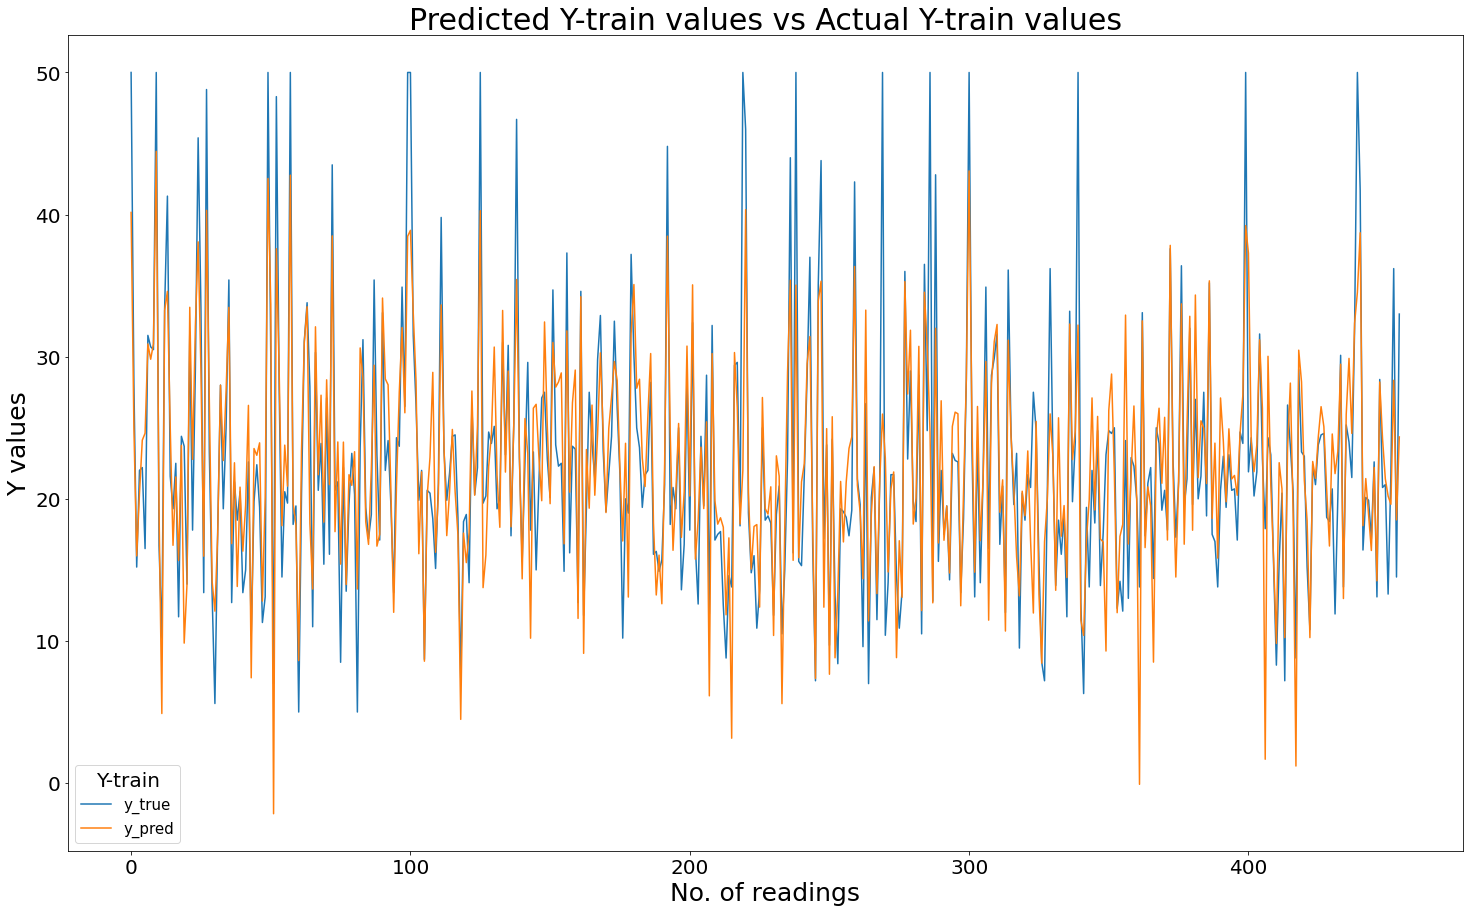

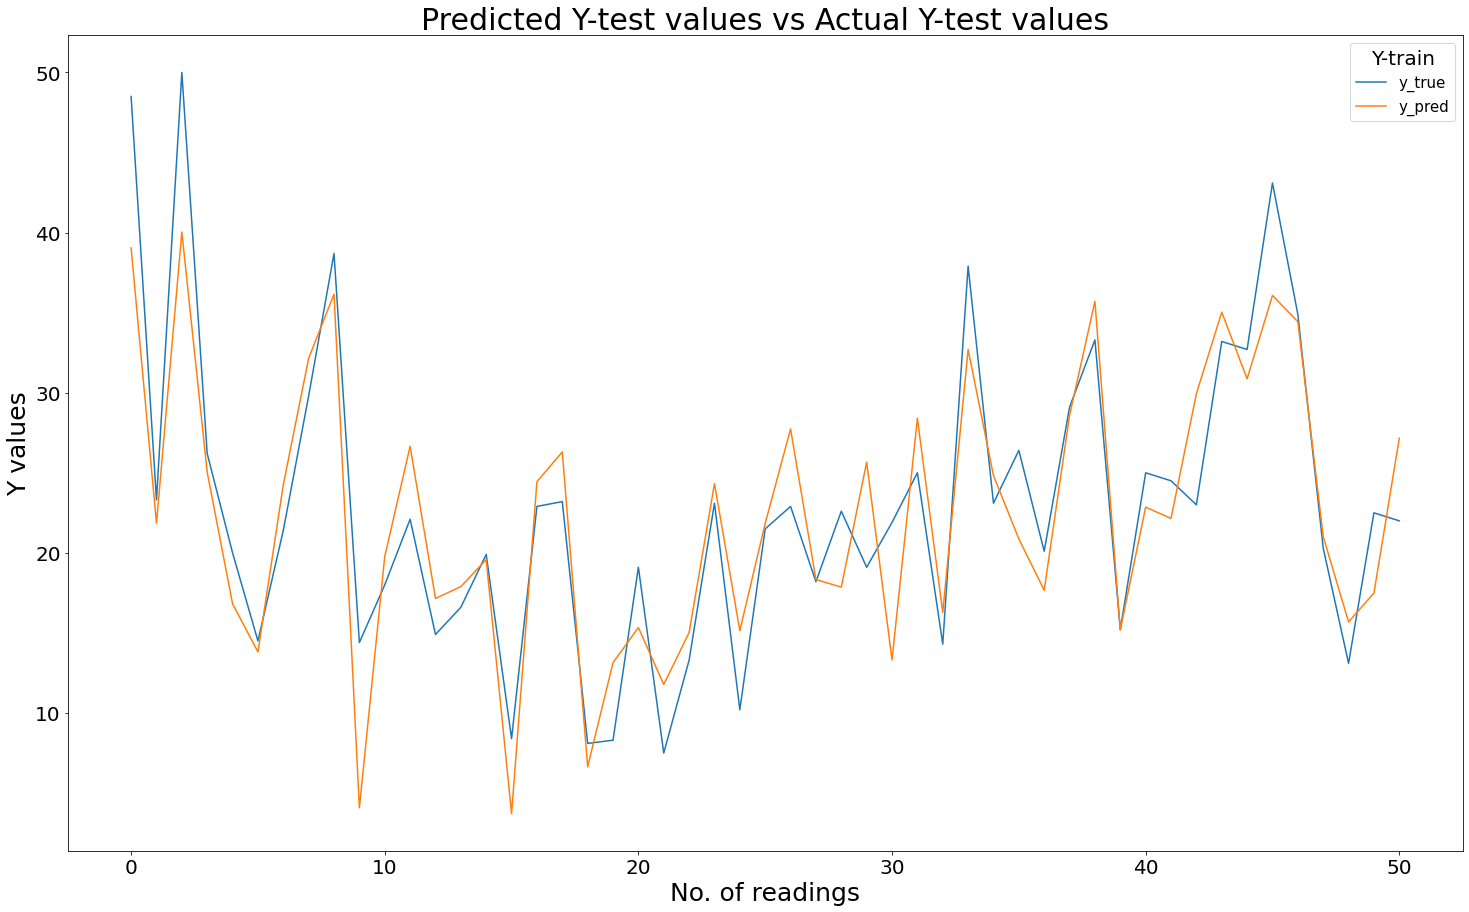

In [13]:
X_bias = np.c_[np.ones((len(X_train),1)),X_train]
theta_list=gradient_descent(X_bias,y_train,np.random.randn(14,1),0.3,20000)
b=theta_list[0]

def predict(X, w, c):
    return X.dot(w) + c

predicted_y_train = predict(X_train, b[1:], b[0])
predicted_y_test = predict(X_test, b[1:], b[0])

y_true=y_train.reshape(len(y_train),)
y_pred=predicted_y_train.reshape(len(predicted_y_train),)

header = ['y_true','y_pred']
df = pd.DataFrame(list(zip(y_true, y_pred)), columns=header)
df.plot(use_index=True, figsize=(25,15))
plt.xlabel("No. of readings", fontsize=25)
plt.ylabel("Y values", fontsize=25)
plt.tick_params(labelsize=20)
plt.legend(title='Y-train',fontsize=15, title_fontsize=20)
plt.title(label="Predicted Y-train values vs Actual Y-train values", fontsize=30);

Y_true=y_test.reshape(len(y_test),)
Y_pred=predicted_y_test.reshape(len(predicted_y_test),)

header1 = ['y_true','y_pred']
df1 = pd.DataFrame(list(zip(Y_true, Y_pred)), columns=header1)
df1.plot(use_index=True, figsize=(25,15))
plt.xlabel("No. of readings", fontsize=25)
plt.ylabel("Y values", fontsize=25)
plt.legend(title='Y-train',fontsize=15, title_fontsize=20)
plt.tick_params(labelsize=20)
plt.title(label="Predicted Y-test values vs Actual Y-test values", fontsize=30);

Qns9:

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
print("\nTrain RMSE using sklearn linear regression model:",
round(np.sqrt(mean_squared_error(y_train, y_pred_train)),3))
print("\nTrain R2 using sklearn linear regression model:",
round(r2_score(y_train, y_pred_train),3))

y_pred_test = reg.predict(X_test)
print("\nTest RMSE using sklearn linear regression model:",
round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3))
print("\nTest R2 using sklearn linear regression model:",
round(r2_score(y_test, y_pred_test),3))


print("\nTrain RMSE using own constructed linear regression model:",
round(rmse_metric(y_train, predicted_y_train),3))
print("\nTrain R2 using own constructed linear regression model:",
round(R2_score(y_train, y_pred_train),3))

print("\nTest RMSE using own construct linear regression model:",
round(rmse_metric(y_test, predicted_y_test),3))
print("\nTest R2 using own construct linear regression model:",
round(R2_score(y_test, predicted_y_test),3))


Train RMSE using sklearn linear regression model: 4.937

Train R2 using sklearn linear regression model: 0.709

Test RMSE using sklearn linear regression model: 4.214

Test R2 using sklearn linear regression model: 0.802

Train RMSE using own constructed linear regression model: 4.937

Train R2 using own constructed linear regression model: 0.709

Test RMSE using own construct linear regression model: 4.214

Test R2 using own construct linear regression model: 0.802


In [15]:
header2 = [np.array(['rmse','rmse','r2_Score', 'r2_Score']), np.array(['Actual','Predicted','Actual', 'Predicted'])]
sklearn=['sklearn',round(np.sqrt(mean_squared_error(y_train, y_pred_train)),3), round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3), round(r2_score(y_train, y_pred_train), 3), round(r2_score(y_test, y_pred_test),3)]
constructlearn=['own construct',round(rmse_metric(y_train, predicted_y_train),3), round(rmse_metric(y_test, predicted_y_test),3), round(R2_score(y_train, y_pred_train),3), round(R2_score(y_test, predicted_y_test),3)]
df2 = pd.DataFrame(list(zip(sklearn,constructlearn)))
df3=df2.transpose()
df4=df3.set_index(df3.columns[0])
df4.columns = pd.MultiIndex.from_arrays(header2)
df4.index.names = ['Models']
df4

rmse           r2_Score          
              Actual Predicted   Actual Predicted
Models                                           
sklearn        4.937     4.214    0.709     0.802
own construct  4.937     4.214    0.709     0.802